<h3>Midterm Data Analysis</h3>
<h> Data analysis, visualization, and hypothesis testing on a real-world dataset</h>

<h> Drew Caldwell,  3/7/2024,   Indiana University - Kokomo</h>


<p>The dataset is provided in the canvas page. The data set is the diabetes csv file of the Pima Indians. It appears that this csv file just looks at health characteristics of the Pima Indians.</p>

<p>An outcome of 1 means that the surveyee has diabetes and an outcome of 0 concludes that they do not have diabetes.</p>

<h3>Initialization</h3>
<p>First we have to begin by importing all of the libraries that we need to use. We will need pands, matplotlib, and scipy.stats for our visualization and statistical tests. Our data set looks at different health characteristics of the Pima Indians. Each row is a different person, and we have values such as Pregnancies, Glucose level, Blood Pressure, Skin Thickness, Insulin, BMI, Age, and Outcome. If Outcome = 1 then we know that the person associated with that row is positive for diabetes.</p>

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load dataset
url = "https://raw.githubusercontent.com/drewdcaldwell/CSCI_490_Midterm/main/diabetes.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


<h3>Visualization</h3>

<p>To begin, we will visualize the average glucose level for the Pima Indians that have diabetes, and do not have diabetes.The blue column will recognize the average glucose level of Pima Indians that do no have diabetes, and the Orange bar will recognize the average glucose level of Pima Indians that have diabetes.</p>

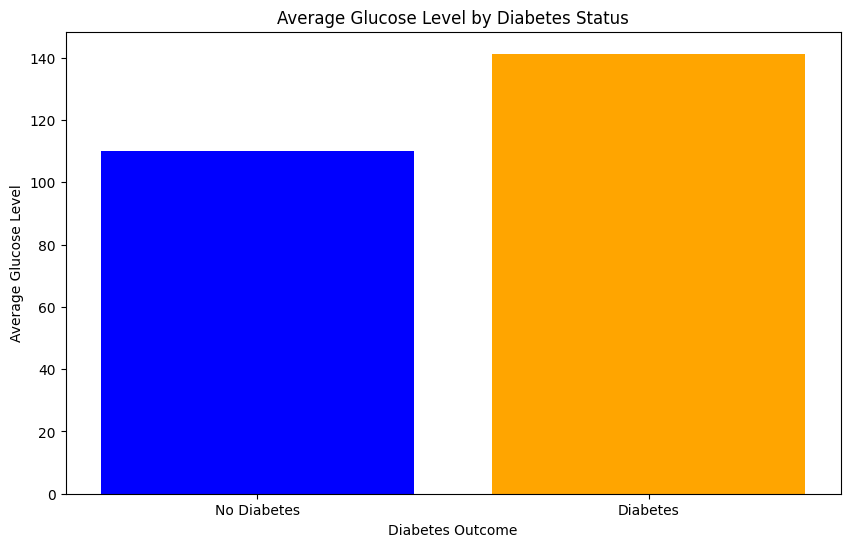

In [3]:
# Group the data by Outcome and calculate the mean of Glucose
outcome_glucose = df.groupby('Outcome')['Glucose'].mean()

# Define colors for the bars
colors = {0: 'blue', 1: 'orange'}

# Create a bar graph 
plt.figure(figsize=(10, 6))

# for loop to get the proper values
for outcome, mean_glucose in outcome_glucose.items():
    outcome_label = 'No Diabetes' if outcome == 0 else 'Diabetes'
    plt.bar(outcome_label, mean_glucose, color=colors[outcome])


# Set labels and title
plt.xlabel('Diabetes Outcome')
plt.ylabel('Average Glucose Level')
plt.title('Average Glucose Level by Diabetes Status')

# Show the plot
plt.show()


<p>We see that the average glucose level in Pima Indians with diabetes is much higher than the average glucose level in those without diabetes.</p>

<p>Now, we will compare the average blood pressure level of Pima Indians with diabetes and without diabetes. The blue bar will represent the average blood pressure level of Pima Indians without diabetes and the Orange bar will represent the average blood pressure of Pima Indians with diabetes. </p>

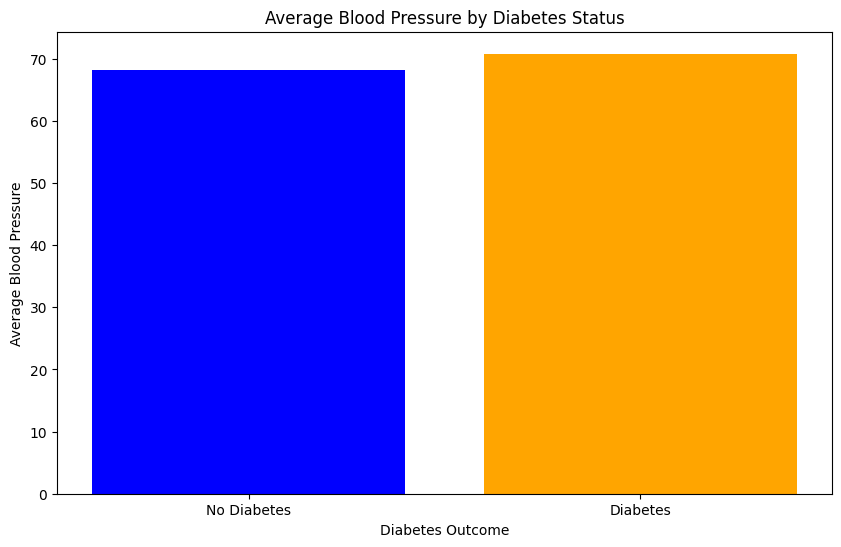

In [4]:
# Group the data by Outcome and calculate the mean of Glucose
outcome_bloodpressure = df.groupby('Outcome')['BloodPressure'].mean()

# Define colors for the bars
colors = {0: 'blue', 1: 'orange'}

# Create a bar graph
plt.figure(figsize=(10, 6))

# For loop to get the proper values
for outcome, mean_bloodpressure in outcome_bloodpressure.items():
    outcome_label = 'No Diabetes' if outcome == 0 else 'Diabetes'
    plt.bar(outcome_label, mean_bloodpressure, color=colors[outcome])

# Set labels and title
plt.xlabel('Diabetes Outcome')
plt.ylabel('Average Blood Pressure')
plt.title('Average Blood Pressure by Diabetes Status')

# Show the plot
plt.show()

<p>Thus we can see that the average blood pressure of Pima Indians without diabetes and with diabetes is quite close.</p>

<h3>Hypothesis Test 1:</h3>
The average glucose level for people with diabetes is significantly greater than the average glucose level for people without diabetes.

In [5]:
# Separate data for people with diabetes and without diabetes
glucose_diabetes = df[df['Outcome'] == 1]['Glucose']
glucose_no_diabetes = df[df['Outcome'] == 0]['Glucose']

# Conduct hypothesis testing for average glucose level
t_stat_glucose, p_value_glucose = ttest_ind(glucose_diabetes, glucose_no_diabetes, alternative='greater')

# Print the results
print("Hypothesis Testing for Average Glucose Level:")
print(f"T-statistic: {t_stat_glucose}")
print(f"P-value: {p_value_glucose}")
if p_value_glucose < 0.05:
    print("Conclusion: Reject the null hypothesis. The average glucose level for people with diabetes is significantly greater than for people without diabetes.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")


Hypothesis Testing for Average Glucose Level:
T-statistic: 14.600060005973894
P-value: 4.467715822644957e-43
Conclusion: Reject the null hypothesis. The average glucose level for people with diabetes is significantly greater than for people without diabetes.


<h3>Hypothesis Test 2:</h3>
 The average blood pressure for people with diabetes is significantly greater than the average blood pressure for people without diabetes.

In [6]:
# Separate data for people with diabetes and without diabetes
bp_diabetes = df[df['Outcome'] == 1]['BloodPressure']
bp_no_diabetes = df[df['Outcome'] == 0]['BloodPressure']

# Conduct hypothesis testing for average blood pressure
t_stat_bp, p_value_bp = ttest_ind(bp_diabetes, bp_no_diabetes, alternative='greater')

#Print the results
print("Hypothesis Testing for Average Blood Pressure:")
print(f"T-statistic: {t_stat_bp}")
print(f"P-value: {p_value_bp}")
if p_value_bp < 0.05:
    print("Conclusion: Reject the null hypothesis. The average blood pressure for people with diabetes is significantly greater than for people without diabetes.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")


Hypothesis Testing for Average Blood Pressure:
T-statistic: 1.8047023017353887
P-value: 0.03575695004888041
Conclusion: Reject the null hypothesis. The average blood pressure for people with diabetes is significantly greater than for people without diabetes.


<h3>Extra Visualization</h3>

<p>Here is another graph visualizing the data. I thought the pregnancies characteristic was interesting, so I decided to look at that a little further. In this bar graph we look at the age of the respondents vs. their pregnancy count. </p>

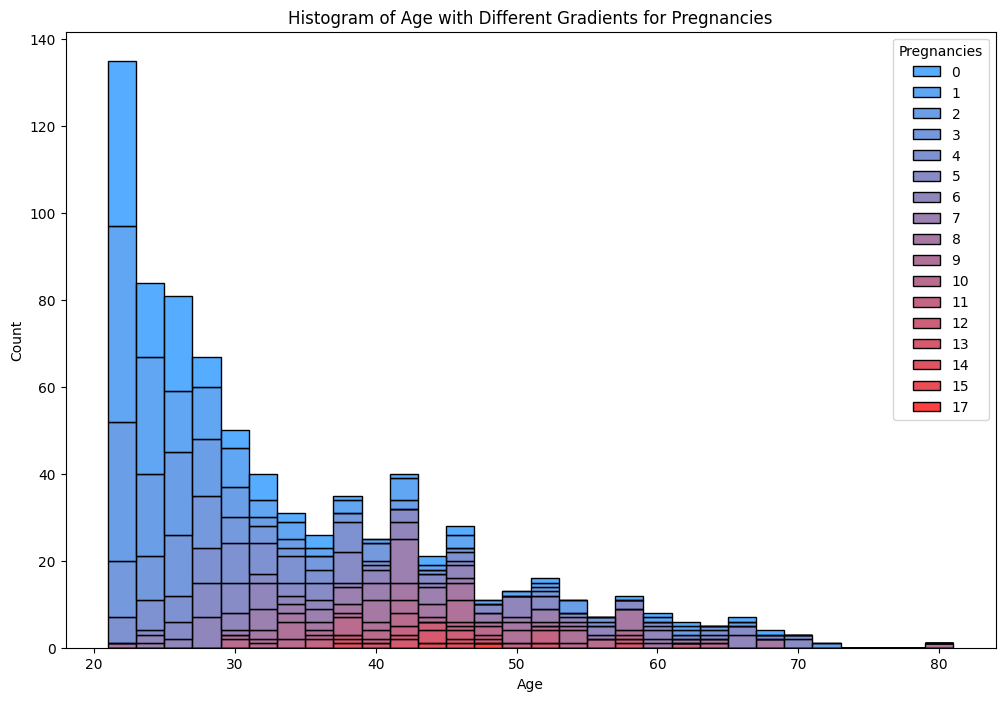

In [7]:
import seaborn as sns


# Create a histogram for Age with different colors for each depression level
plt.figure(figsize=(12, 8))

# Create subplots
sns.histplot(data=df, x='Age', hue='Pregnancies', multiple='stack', bins=30, palette="blend:dodgerblue,red")

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age with Different Gradients for Pregnancies')

#display the graph to user
plt.show()

<p>We see that most of the respondents fall between 20-30. More importantly though we see that as age rises so doe s the number of pregnancies per individual. With the falloff around 50 of a higher number of pregnancies, we can infer that more Pima Indians are having children currently, as more women under the age of 50 are having 10+ children.</p>